In [1]:
import pandas
import logging
import variant_calling_benchmarks
from variant_calling_benchmarks import analysis
import seaborn
reload(analysis)
reload(variant_calling_benchmarks)

import sklearn.linear_model
import sklearn.cross_validation
import sklearn.ensemble


%pylab inline

pandas.set_option("display.max_columns", 500)
logger = logging.getLogger().setLevel(logging.DEBUG)

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [4]:
'''
# Takes 4 mins to load from cloud:
from variant_calling_benchmarks import analysis
benchmark = "gs://variant-calling-benchmarks-results/manifest.aocs.281c84ca79aca6fd.2b655b4f3eb7bb55.json"
%time df = analysis.load_benchmark_result(benchmark)
print(df.shape)
'''

# About 1 min faster to load locally:
%time df = analysis.load_benchmark_result("/Users/tim/sinai/data/gcs/variant-calling-benchmarks-results/manifest.aocs.281c84ca79aca6fd.2b655b4f3eb7bb55.json")
df

INFO:root:Loading merged calls from: /Users/tim/sinai/data/gcs/variant-calling-benchmarks-results/merged_calls.aocs.2b655b4f3eb7bb55.csv.gz
INFO:root:Done loading.
INFO:root:Decoding column: filter_json
INFO:root:Decoding column: info:TRIGGER_json
INFO:root:Decoding column: normal_blood_ADP_json
INFO:root:Decoding column: normal_blood_FF_json
INFO:root:Decoding column: normal_blood_RL_json
INFO:root:Decoding column: pooled_tumor_ADP_json
INFO:root:Decoding column: pooled_tumor_FF_json
INFO:root:Decoding column: pooled_tumor_RL_json
INFO:root:Decoding column: primary_ADP_json
INFO:root:Decoding column: primary_FF_json
INFO:root:Decoding column: primary_RL_json
INFO:root:Decoding column: relapse_ADP_json
INFO:root:Decoding column: relapse_FF_json
INFO:root:Decoding column: relapse_RL_json


CPU times: user 2min 56s, sys: 47.9 s, total: 3min 44s
Wall time: 4min 14s


,genome,contig,interbase_start,interbase_end,ref,alt,alt_allele_index,filter,id,info:TRIGGER,qual,patient,filter_INSUFFICIENT_NORMAL,filter_STRAND_BIAS,normal_blood_ADP,normal_blood_AD_alt,normal_blood_AD_ref,normal_blood_DP,normal_blood_FF,normal_blood_FS,normal_blood_GT,normal_blood_RL,normal_blood_RL_alt,normal_blood_RL_ref,normal_blood_TRIGGERED,normal_blood_VAF,pooled_tumor_ADP,pooled_tumor_AD_alt,pooled_tumor_AD_ref,pooled_tumor_DP,pooled_tumor_FF,pooled_tumor_FS,pooled_tumor_GT,pooled_tumor_RL,pooled_tumor_RL_alt,pooled_tumor_RL_ref,pooled_tumor_TRIGGERED,pooled_tumor_VAF,primary_ADP,primary_AD_alt,primary_AD_ref,primary_DP,primary_FF,primary_FS,primary_GT,primary_RL,primary_RL_alt,primary_RL_ref,primary_TRIGGERED,primary_VAF,relapse_ADP,relapse_AD_alt,relapse_AD_ref,relapse_DP,relapse_FF,relapse_FS,relapse_GT,relapse_RL,relapse_RL_alt,relapse_RL_ref,relapse_TRIGGERED,relapse_VAF,trigger_GERMLINE_POOLED,trigger_SOMATIC_INDIVIDUAL,trigger_SOMATIC_POOLED,tumor_expression,triggered,filtered,called_guacamole,called_published,snv
0,GRCh37,1,10020,10021,,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[A=640, AC=2, T=4, G=3, C=20]",2.0,640.0,669.0,[STRAND_BIAS],66.0,0/0,"{u'('A', 'A')': -66.700237, u'('A', 'AC')': -1...",-132.421990,-66.700237,False,0.002990,"[A=526, AC=8, T=1, G=6, C=9]",8.0,526.0,550.0,[STRAND_BIAS],212.0,0/0,"{u'(('A', 1.0),)': -58.64091, u'(('AC', 0.05),...",-58.279355,-58.640910,True,0.015,"[A=298, AC=2, T=1, G=4, C=5]",2.0,298.0,310.0,None,58.0,0/0,"{u'(('A', 1.0),)': -27.838677, u'(('AC', 0.05)...",-34.636255,-27.838677,False,0.006452,"[A=228, AC=6, C=4, G=2]",6.0,228.0,240.0,[STRAND_BIAS],139.0,0/1,"{u'(('A', 1.0),)': -30.802233, u'(('AC', 0.05)...",-29.643100,-30.802233,True,0.025,False,True,True,False,True,True,False,False,False
1,GRCh37,1,10050,10051,,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[A=1022, AC=4, T=4, G=9, C=25]",4.0,1022.0,1064.0,[STRAND_BIAS],126.0,0/0,"{u'('A', 'A')': -94.783747, u'('A', 'AC')': -2...",-223.051900,-94.783747,False,0.003759,"[A=764, AC=15, G=9, AG=3, C=20]",15.0,764.0,811.0,[STRAND_BIAS],385.0,0/0,"{u'(('A', 1.0),)': -95.62937, u'(('AC', 0.05),...",-93.638972,-95.629370,True,0.018,"[A=427, AC=7, G=3, AG=2, C=15]",7.0,427.0,454.0,[STRAND_BIAS],174.0,0/0,"{u'(('A', 1.0),)': -48.346259, u'(('AC', 0.05)...",-52.156155,-48.346259,False,0.015000,"[A=337, AC=8, T=1, G=6, C=5]",8.0,337.0,357.0,[STRAND_BIAS],194.0,0/1,"{u'(('A', 1.0),)': -47.283111, u'(('AC', 0.05)...",-47.482816,-47.283111,False,0.022,False,False,True,False,True,True,False,False,False
2,GRCh37,1,10107,10108,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[C=688, T=63, A=10, CT=5, G=3]",63.0,688.0,769.0,[STRAND_BIAS],1192.0,0/0,"{u'('C', 'C')': -138.56794, u'('C', 'T')': -17...",-176.633060,-138.567940,False,0.082000,"[C=497, T=38, A=7, CCT=3, CT=3]",38.0,497.0,548.0,[STRAND_BIAS],734.0,0/1,"{u'(('C', 1.0),)': -113.12567, u'(('T', 0.06),...",-102.266810,-113.125670,True,0.069,"[C=275, T=24, A=5, CCT=2, CT=2]",24.0,275.0,308.0,[STRAND_BIAS],432.0,0/1,"{u'(('C', 1.0),)': -69.365746, u'(('T', 0.07),...",-60.256810,-69.365746,True,0.078000,"[C=222, T=14, A=2, CCT=1, G=3]",14.0,222.0,242.0,[STRAND_BIAS],273.0,0/1,"{u'(('C', 1.0),)': -43.759923, u'(('T', 0.05),...",-47.636764,-43.759923,False,0.058,False,True,True,False,True,True,False,False,True
3,GRCh37,1,10149,10150,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[C=259, T=27, G=1, A=1]",27.0,259.0,288.0,[STRAND_BIAS],317.0,0/0,"{u'('C', 'C')': -79.777946, u'('C', 'T')': -80...",-80.796931,-79.777946,False,0.094000,"[C=213, T=19]",19.0,213.0,232.0,[STRAND_BIAS],328.0,0/1,"{u'(('C', 1.0),)': -53.661681, u'(('T', 0.08),...",-49.921922,-53.661681,True,0.082,"[C=118, T=9]",9.0,118.0,127.0,[STRAND_BIAS],150.0,0/1,"{u'(('C', 1.0),)': -30.979299, u'(('T', 0.07)

In [5]:
df["site"] = ["%s-%d" % (row.contig, row.interbase_start) for (i,row) in df.iterrows()]
df

,genome,contig,interbase_start,interbase_end,ref,alt,alt_allele_index,filter,id,info:TRIGGER,qual,patient,filter_INSUFFICIENT_NORMAL,filter_STRAND_BIAS,normal_blood_ADP,normal_blood_AD_alt,normal_blood_AD_ref,normal_blood_DP,normal_blood_FF,normal_blood_FS,normal_blood_GT,normal_blood_RL,normal_blood_RL_alt,normal_blood_RL_ref,normal_blood_TRIGGERED,normal_blood_VAF,pooled_tumor_ADP,pooled_tumor_AD_alt,pooled_tumor_AD_ref,pooled_tumor_DP,pooled_tumor_FF,pooled_tumor_FS,pooled_tumor_GT,pooled_tumor_RL,pooled_tumor_RL_alt,pooled_tumor_RL_ref,pooled_tumor_TRIGGERED,pooled_tumor_VAF,primary_ADP,primary_AD_alt,primary_AD_ref,primary_DP,primary_FF,primary_FS,primary_GT,primary_RL,primary_RL_alt,primary_RL_ref,primary_TRIGGERED,primary_VAF,relapse_ADP,relapse_AD_alt,relapse_AD_ref,relapse_DP,relapse_FF,relapse_FS,relapse_GT,relapse_RL,relapse_RL_alt,relapse_RL_ref,relapse_TRIGGERED,relapse_VAF,trigger_GERMLINE_POOLED,trigger_SOMATIC_INDIVIDUAL,trigger_SOMATIC_POOLED,tumor_expression,triggered,filtered,called_guacamole,called_published,snv,site
0,GRCh37,1,10020,10021,,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[A=640, AC=2, T=4, G=3, C=20]",2.0,640.0,669.0,[STRAND_BIAS],66.0,0/0,"{u'('A', 'A')': -66.700237, u'('A', 'AC')': -1...",-132.421990,-66.700237,False,0.002990,"[A=526, AC=8, T=1, G=6, C=9]",8.0,526.0,550.0,[STRAND_BIAS],212.0,0/0,"{u'(('A', 1.0),)': -58.64091, u'(('AC', 0.05),...",-58.279355,-58.640910,True,0.015,"[A=298, AC=2, T=1, G=4, C=5]",2.0,298.0,310.0,None,58.0,0/0,"{u'(('A', 1.0),)': -27.838677, u'(('AC', 0.05)...",-34.636255,-27.838677,False,0.006452,"[A=228, AC=6, C=4, G=2]",6.0,228.0,240.0,[STRAND_BIAS],139.0,0/1,"{u'(('A', 1.0),)': -30.802233, u'(('AC', 0.05)...",-29.643100,-30.802233,True,0.025,False,True,True,False,True,True,False,False,False,1-10020
1,GRCh37,1,10050,10051,,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[A=1022, AC=4, T=4, G=9, C=25]",4.0,1022.0,1064.0,[STRAND_BIAS],126.0,0/0,"{u'('A', 'A')': -94.783747, u'('A', 'AC')': -2...",-223.051900,-94.783747,False,0.003759,"[A=764, AC=15, G=9, AG=3, C=20]",15.0,764.0,811.0,[STRAND_BIAS],385.0,0/0,"{u'(('A', 1.0),)': -95.62937, u'(('AC', 0.05),...",-93.638972,-95.629370,True,0.018,"[A=427, AC=7, G=3, AG=2, C=15]",7.0,427.0,454.0,[STRAND_BIAS],174.0,0/0,"{u'(('A', 1.0),)': -48.346259, u'(('AC', 0.05)...",-52.156155,-48.346259,False,0.015000,"[A=337, AC=8, T=1, G=6, C=5]",8.0,337.0,357.0,[STRAND_BIAS],194.0,0/1,"{u'(('A', 1.0),)': -47.283111, u'(('AC', 0.05)...",-47.482816,-47.283111,False,0.022,False,False,True,False,True,True,False,False,False,1-10050
2,GRCh37,1,10107,10108,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[C=688, T=63, A=10, CT=5, G=3]",63.0,688.0,769.0,[STRAND_BIAS],1192.0,0/0,"{u'('C', 'C')': -138.56794, u'('C', 'T')': -17...",-176.633060,-138.567940,False,0.082000,"[C=497, T=38, A=7, CCT=3, CT=3]",38.0,497.0,548.0,[STRAND_BIAS],734.0,0/1,"{u'(('C', 1.0),)': -113.12567, u'(('T', 0.06),...",-102.266810,-113.125670,True,0.069,"[C=275, T=24, A=5, CCT=2, CT=2]",24.0,275.0,308.0,[STRAND_BIAS],432.0,0/1,"{u'(('C', 1.0),)': -69.365746, u'(('T', 0.07),...",-60.256810,-69.365746,True,0.078000,"[C=222, T=14, A=2, CCT=1, G=3]",14.0,222.0,242.0,[STRAND_BIAS],273.0,0/1,"{u'(('C', 1.0),)': -43.759923, u'(('T', 0.05),...",-47.636764,-43.759923,False,0.058,False,True,True,False,True,True,False,False,True,1-10107
3,GRCh37,1,10149,10150,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[C=259, T=27, G=1, A=1]",27.0,259.0,288.0,[STRAND_BIAS],317.0,0/0,"{u'('C', 'C')': -79.777946, u'('C', 'T')': -80...",-80.796931,-79.777946,False,0.094000,"[C=213, T=19]",19.0,213.0,232.0,[STRAND_BIAS],328.0,0/1,"{u'(('C', 1.0),)': -53.661681, u'(('T', 0.08),...",-49.921922,-53.661681,True,0.082,"[C=118, T=9]",9.0,118.0,127.0,[STRAND_BIAS],150.0,0/1,"{u'(('C', 1.0),)

In [6]:
site_counts = df.site.value_counts()
duplicate_sites = site_counts.index[site_counts > 1]
duplicate_sites
df["alt_disagreement"] = df.site.isin(set(duplicate_sites))
df

,genome,contig,interbase_start,interbase_end,ref,alt,alt_allele_index,filter,id,info:TRIGGER,qual,patient,filter_INSUFFICIENT_NORMAL,filter_STRAND_BIAS,normal_blood_ADP,normal_blood_AD_alt,normal_blood_AD_ref,normal_blood_DP,normal_blood_FF,normal_blood_FS,normal_blood_GT,normal_blood_RL,normal_blood_RL_alt,normal_blood_RL_ref,normal_blood_TRIGGERED,normal_blood_VAF,pooled_tumor_ADP,pooled_tumor_AD_alt,pooled_tumor_AD_ref,pooled_tumor_DP,pooled_tumor_FF,pooled_tumor_FS,pooled_tumor_GT,pooled_tumor_RL,pooled_tumor_RL_alt,pooled_tumor_RL_ref,pooled_tumor_TRIGGERED,pooled_tumor_VAF,primary_ADP,primary_AD_alt,primary_AD_ref,primary_DP,primary_FF,primary_FS,primary_GT,primary_RL,primary_RL_alt,primary_RL_ref,primary_TRIGGERED,primary_VAF,relapse_ADP,relapse_AD_alt,relapse_AD_ref,relapse_DP,relapse_FF,relapse_FS,relapse_GT,relapse_RL,relapse_RL_alt,relapse_RL_ref,relapse_TRIGGERED,relapse_VAF,trigger_GERMLINE_POOLED,trigger_SOMATIC_INDIVIDUAL,trigger_SOMATIC_POOLED,tumor_expression,triggered,filtered,called_guacamole,called_published,snv,site,alt_disagreement
0,GRCh37,1,10020,10021,,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[A=640, AC=2, T=4, G=3, C=20]",2.0,640.0,669.0,[STRAND_BIAS],66.0,0/0,"{u'('A', 'A')': -66.700237, u'('A', 'AC')': -1...",-132.421990,-66.700237,False,0.002990,"[A=526, AC=8, T=1, G=6, C=9]",8.0,526.0,550.0,[STRAND_BIAS],212.0,0/0,"{u'(('A', 1.0),)': -58.64091, u'(('AC', 0.05),...",-58.279355,-58.640910,True,0.015,"[A=298, AC=2, T=1, G=4, C=5]",2.0,298.0,310.0,None,58.0,0/0,"{u'(('A', 1.0),)': -27.838677, u'(('AC', 0.05)...",-34.636255,-27.838677,False,0.006452,"[A=228, AC=6, C=4, G=2]",6.0,228.0,240.0,[STRAND_BIAS],139.0,0/1,"{u'(('A', 1.0),)': -30.802233, u'(('AC', 0.05)...",-29.643100,-30.802233,True,0.025,False,True,True,False,True,True,False,False,False,1-10020,False
1,GRCh37,1,10050,10051,,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[A=1022, AC=4, T=4, G=9, C=25]",4.0,1022.0,1064.0,[STRAND_BIAS],126.0,0/0,"{u'('A', 'A')': -94.783747, u'('A', 'AC')': -2...",-223.051900,-94.783747,False,0.003759,"[A=764, AC=15, G=9, AG=3, C=20]",15.0,764.0,811.0,[STRAND_BIAS],385.0,0/0,"{u'(('A', 1.0),)': -95.62937, u'(('AC', 0.05),...",-93.638972,-95.629370,True,0.018,"[A=427, AC=7, G=3, AG=2, C=15]",7.0,427.0,454.0,[STRAND_BIAS],174.0,0/0,"{u'(('A', 1.0),)': -48.346259, u'(('AC', 0.05)...",-52.156155,-48.346259,False,0.015000,"[A=337, AC=8, T=1, G=6, C=5]",8.0,337.0,357.0,[STRAND_BIAS],194.0,0/1,"{u'(('A', 1.0),)': -47.283111, u'(('AC', 0.05)...",-47.482816,-47.283111,False,0.022,False,False,True,False,True,True,False,False,False,1-10050,False
2,GRCh37,1,10107,10108,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[C=688, T=63, A=10, CT=5, G=3]",63.0,688.0,769.0,[STRAND_BIAS],1192.0,0/0,"{u'('C', 'C')': -138.56794, u'('C', 'T')': -17...",-176.633060,-138.567940,False,0.082000,"[C=497, T=38, A=7, CCT=3, CT=3]",38.0,497.0,548.0,[STRAND_BIAS],734.0,0/1,"{u'(('C', 1.0),)': -113.12567, u'(('T', 0.06),...",-102.266810,-113.125670,True,0.069,"[C=275, T=24, A=5, CCT=2, CT=2]",24.0,275.0,308.0,[STRAND_BIAS],432.0,0/1,"{u'(('C', 1.0),)': -69.365746, u'(('T', 0.07),...",-60.256810,-69.365746,True,0.078000,"[C=222, T=14, A=2, CCT=1, G=3]",14.0,222.0,242.0,[STRAND_BIAS],273.0,0/1,"{u'(('C', 1.0),)': -43.759923, u'(('T', 0.05),...",-47.636764,-43.759923,False,0.058,False,True,True,False,True,True,False,False,True,1-10107,False
3,GRCh37,1,10149,10150,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[C=259, T=27, G=1, A=1]",27.0,259.0,288.0,[STRAND_BIAS],317.0,0/0,"{u'('C', 'C')': -79.777946, u'('C', 'T')': -80...",-80.796931,-79.777946,False,0.094000,"[C=213, T=19]",19.0,213.0,232.0,[STRAND_BIAS],328.0,0/1,"{u'(('C', 1.0),)': -53.661681, u'(('T', 0.08),...",-49.921922,-53.661681,True,0.082,"[C=118, T=9]",9.0,118.0,127.0,[STRAN

In [7]:
df_snv = df.ix[df.snv].copy()
df_snv.shape

(641422, 73)

# summary of what we did on published calls: how many did we get, how many were filtered, how many had too low likelihood, how many didn’t even have the right alternate considered

In [8]:
def guacamole_status(row):
    pieces = []
    if row.trigger_GERMLINE_POOLED:
        pieces.append("GERMLINE")
    if row.trigger_SOMATIC_POOLED:
        pieces.append("SOMATIC_POOLED")
    if row.trigger_SOMATIC_INDIVIDUAL:
        pieces.append("SOMATIC_INDIVIDUAL")
    if not pieces:
        pieces.append("NO_TRIGGER")
    if row.alt_disagreement:
        pieces.insert(0, "ALT_DISAGREEMENT")
    if row["filter"]:
        pieces.extend(row["filter"])
    return "-".join(pieces)

%time df_snv["guacamole_status"] = [guacamole_status(row) for (i, row) in df_snv.iterrows()]
df_snv

CPU times: user 1min 28s, sys: 2 s, total: 1min 30s
Wall time: 1min 31s


,genome,contig,interbase_start,interbase_end,ref,alt,alt_allele_index,filter,id,info:TRIGGER,qual,patient,filter_INSUFFICIENT_NORMAL,filter_STRAND_BIAS,normal_blood_ADP,normal_blood_AD_alt,normal_blood_AD_ref,normal_blood_DP,normal_blood_FF,normal_blood_FS,normal_blood_GT,normal_blood_RL,normal_blood_RL_alt,normal_blood_RL_ref,normal_blood_TRIGGERED,normal_blood_VAF,pooled_tumor_ADP,pooled_tumor_AD_alt,pooled_tumor_AD_ref,pooled_tumor_DP,pooled_tumor_FF,pooled_tumor_FS,pooled_tumor_GT,pooled_tumor_RL,pooled_tumor_RL_alt,pooled_tumor_RL_ref,pooled_tumor_TRIGGERED,pooled_tumor_VAF,primary_ADP,primary_AD_alt,primary_AD_ref,primary_DP,primary_FF,primary_FS,primary_GT,primary_RL,primary_RL_alt,primary_RL_ref,primary_TRIGGERED,primary_VAF,relapse_ADP,relapse_AD_alt,relapse_AD_ref,relapse_DP,relapse_FF,relapse_FS,relapse_GT,relapse_RL,relapse_RL_alt,relapse_RL_ref,relapse_TRIGGERED,relapse_VAF,trigger_GERMLINE_POOLED,trigger_SOMATIC_INDIVIDUAL,trigger_SOMATIC_POOLED,tumor_expression,triggered,filtered,called_guacamole,called_published,snv,site,alt_disagreement,guacamole_status
2,GRCh37,1,10107,10108,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[C=688, T=63, A=10, CT=5, G=3]",63.0,688.0,769.0,[STRAND_BIAS],1192.0,0/0,"{u'('C', 'C')': -138.56794, u'('C', 'T')': -17...",-176.633060,-138.567940,False,0.082,"[C=497, T=38, A=7, CCT=3, CT=3]",38.0,497.0,548.0,[STRAND_BIAS],734.0,0/1,"{u'(('C', 1.0),)': -113.12567, u'(('T', 0.06),...",-102.266810,-113.125670,True,0.069,"[C=275, T=24, A=5, CCT=2, CT=2]",24.0,275.0,308.0,[STRAND_BIAS],432.0,0/1,"{u'(('C', 1.0),)': -69.365746, u'(('T', 0.07),...",-60.256810,-69.365746,True,0.078,"[C=222, T=14, A=2, CCT=1, G=3]",14.0,222.0,242.0,[STRAND_BIAS],273.0,0/1,"{u'(('C', 1.0),)': -43.759923, u'(('T', 0.05),...",-47.636764,-43.759923,False,0.058,False,True,True,False,True,True,False,False,True,1-10107,False,SOMATIC_POOLED-SOMATIC_INDIVIDUAL-INSUFFICIENT...
3,GRCh37,1,10149,10150,C,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[C=259, T=27, G=1, A=1]",27.0,259.0,288.0,[STRAND_BIAS],317.0,0/0,"{u'('C', 'C')': -79.777946, u'('C', 'T')': -80...",-80.796931,-79.777946,False,0.094,"[C=213, T=19]",19.0,213.0,232.0,[STRAND_BIAS],328.0,0/1,"{u'(('C', 1.0),)': -53.661681, u'(('T', 0.08),...",-49.921922,-53.661681,True,0.082,"[C=118, T=9]",9.0,118.0,127.0,[STRAND_BIAS],150.0,0/1,"{u'(('C', 1.0),)': -30.979299, u'(('T', 0.07),...",-32.056653,-30.979299,False,0.071,"[C=95, T=10]",10.0,95.0,105.0,[STRAND_BIAS],157.0,0/1,"{u'(('C', 1.0),)': -22.682382, u'(('T', 0.09),...",-23.961791,-22.682382,False,0.095,False,False,True,False,True,True,False,False,True,1-10149,False,SOMATIC_POOLED-INSUFFICIENT_NORMAL-STRAND_BIAS
4,GRCh37,1,10180,10181,A,T,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,"[SOMATIC_POOLED, SOMATIC_INDIVIDUAL]",NaN,AOCS-034,True,True,"[A=210, T=6, AC=1, G=1, C=5]",6.0,210.0,223.0,[STRAND_BIAS],132.0,0/0,"{u'('A', 'A')': -34.317731, u'('A', 'T')': -71...",-71.973763,-34.317731,False,0.027,"[A=139, T=12, C=3, G=2]",12.0,139.0,156.0,[STRAND_BIAS],211.0,0/1,"{u'(('A', 1.0),)': -41.359145, u'(('T', 0.06),...",-39.577666,-41.359145,True,0.077,"[A=86, T=8, G=1, C=1]",8.0,86.0,96.0,[STRAND_BIAS],126.0,0/1,"{u'(('A', 1.0),)': -25.526464, u'(('T', 0.07),...",-25.360115,-25.526464,True,0.083,"[A=53, T=4, C=2, G=1]",4.0,53.0,60.0,[STRAND_BIAS],65.0,0/1,"{u'(('A', 1.0),)': -15.832681, u'(('T', 0.05),...",-20.172671,-15.832681,False,0.067,False,True,True,False,True,True,False,False,True,1-10180,False,SOMATIC_POOLED-SOMATIC_INDIVIDUAL-INSUFFICIENT...
6,GRCh37,1,10249,10250,A,C,0.0,"[INSUFFICIENT_NORMAL, STRAND_BIAS]",NaN,[SOMATIC_POOLED],NaN,AOCS-034,True,True,"[A=72, C=14, T=1]",14.0,72.0,87.0,[STRAND_BIAS],171.0,0/0,"{u'('A', 'A')': -25.989177, u'('A', 'C')': -26...",-26.672205,-25.989177,False,0.161,"[A=97, C=18, T=2]",18.0,97.0,117.0,[STRAND_BIAS],237.0,0/1,"{u'(('A', 1.0),)': -26.227011, u'(('C', 0.14),...",-2

In [9]:
counts = df_snv.ix[df_snv.called_published].guacamole_status.value_counts()
counts

SOMATIC_POOLED-SOMATIC_INDIVIDUAL-STRAND_BIAS                                         6973
SOMATIC_POOLED-SOMATIC_INDIVIDUAL-INSUFFICIENT_NORMAL-STRAND_BIAS                     4369
SOMATIC_POOLED-SOMATIC_INDIVIDUAL                                                      962
NO_TRIGGER                                                                             836
SOMATIC_POOLED-SOMATIC_INDIVIDUAL-INSUFFICIENT_NORMAL                                  630
ALT_DISAGREEMENT-NO_TRIGGER                                                            400
NO_TRIGGER-INSUFFICIENT_NORMAL                                                         243
ALT_DISAGREEMENT-SOMATIC_POOLED-SOMATIC_INDIVIDUAL-INSUFFICIENT_NORMAL-STRAND_BIAS      52
GERMLINE-STRAND_BIAS                                                                    14
ALT_DISAGREEMENT-SOMATIC_POOLED-SOMATIC_INDIVIDUAL-STRAND_BIAS                          14
SOMATIC_POOLED-INSUFFICIENT_NORMAL-STRAND_BIAS                                          11

In [10]:
def move_to_front(series, values):
    desired_order = values + [v for v in list(series.index) if v not in values]
    return series[desired_order]

def add_values_to_series(series):
    result = series.copy()
    for col in series.index:
        result["%s [%s = %0.1f%%]" % (col, series[col], series[col] * 100.0 / series.sum())] = series[col]
        del result[col]
    return result

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


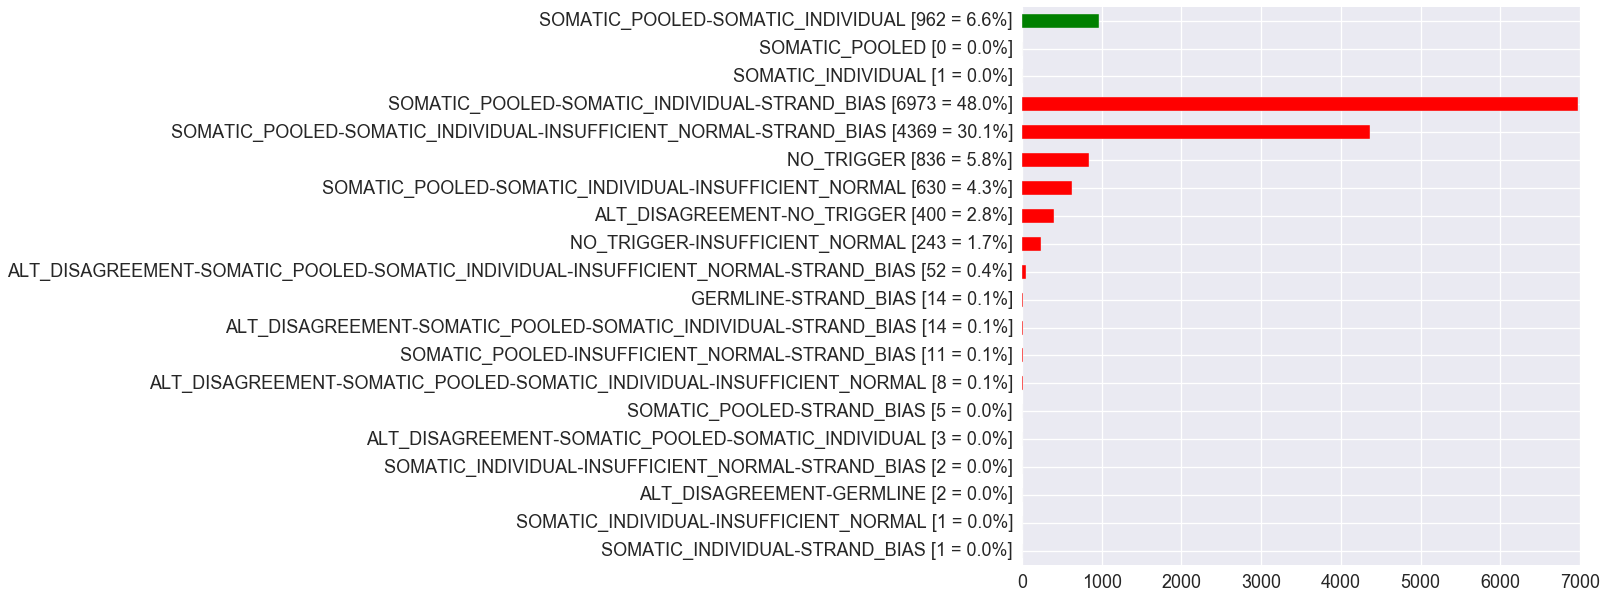

In [11]:
good_calls = ["SOMATIC_POOLED-SOMATIC_INDIVIDUAL", "SOMATIC_POOLED", "SOMATIC_INDIVIDUAL"]
ordered_counts = move_to_front(counts, good_calls)[::-1]
colors = ["green" if c in good_calls else "red" for c in ordered_counts.index]
plot_counts = add_values_to_series(ordered_counts.fillna(0).astype(int))
seaborn.set_context('talk')
matplotlib.rcParams['ytick.labelsize'] = 18 
matplotlib.rcParams['xtick.labelsize'] = 18 


plot_counts.plot('barh', colors=colors, figsize=(10,10))
#pyplot.axhline(len(ordered_counts) - 3.5, color="red")


# summary of calls we made: how many additional calls due to pooling, how many of these were in the reference set

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


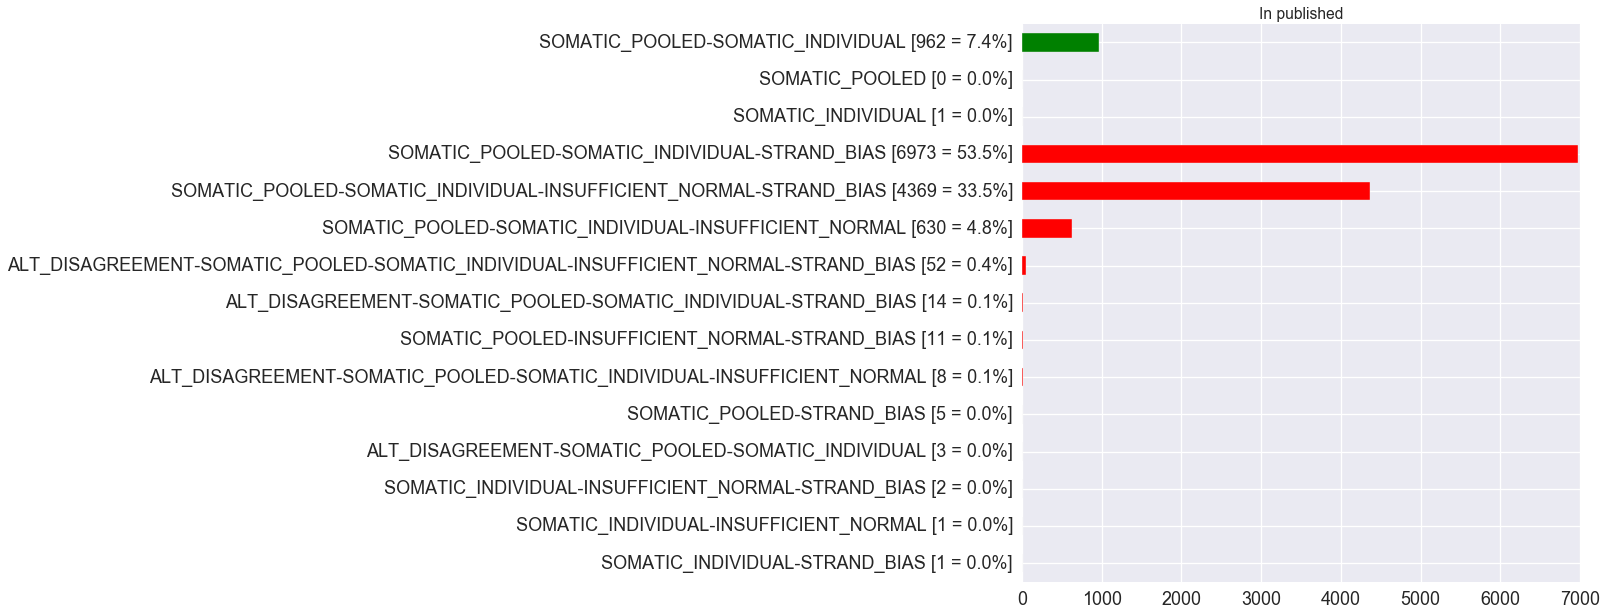

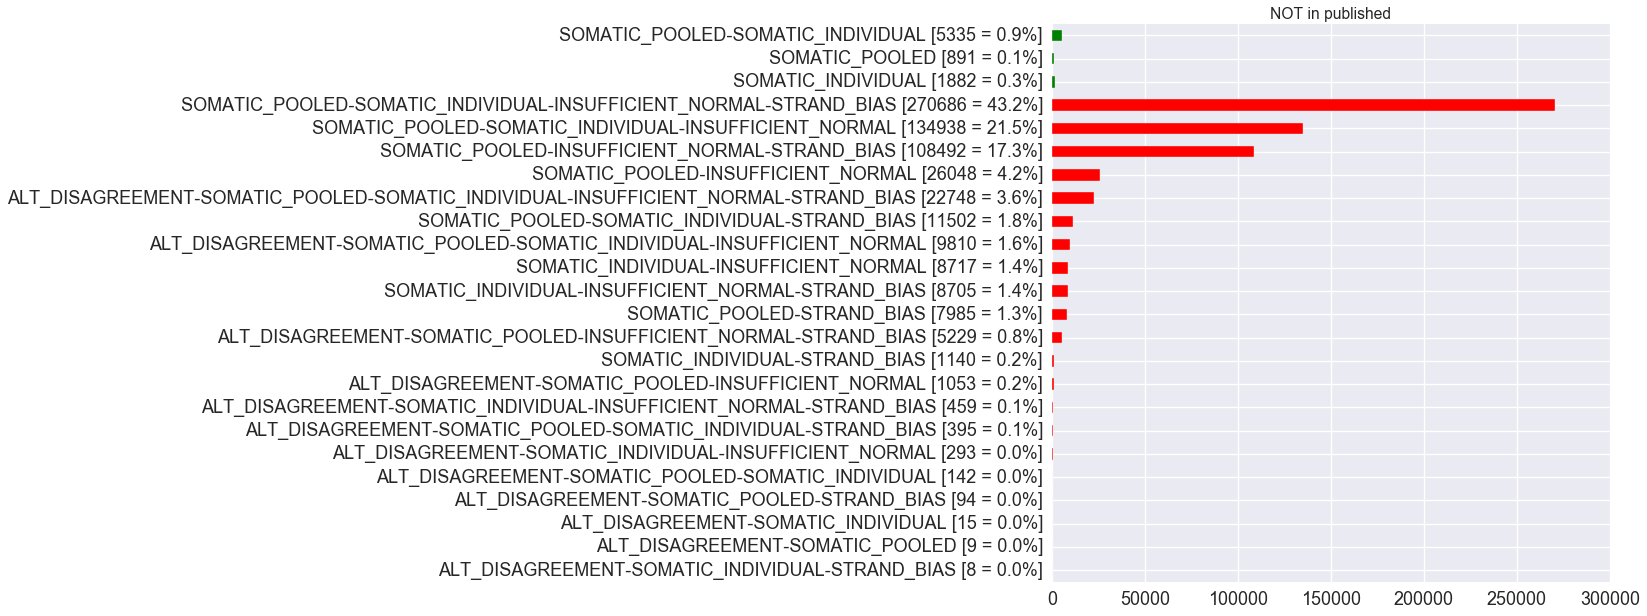

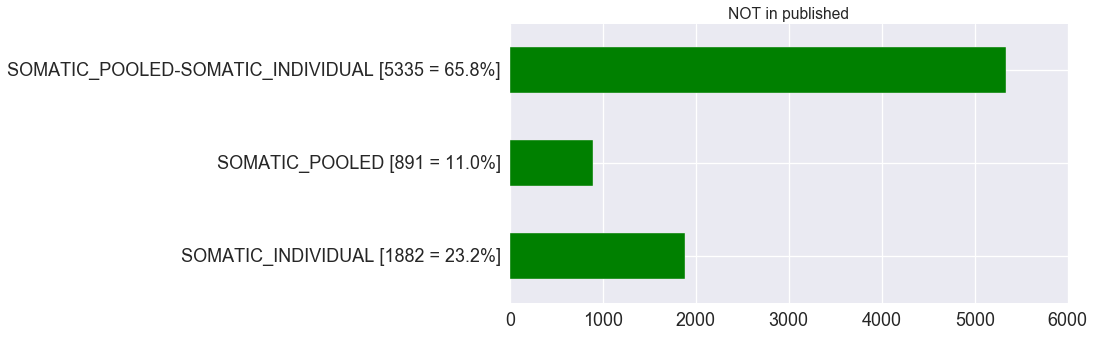

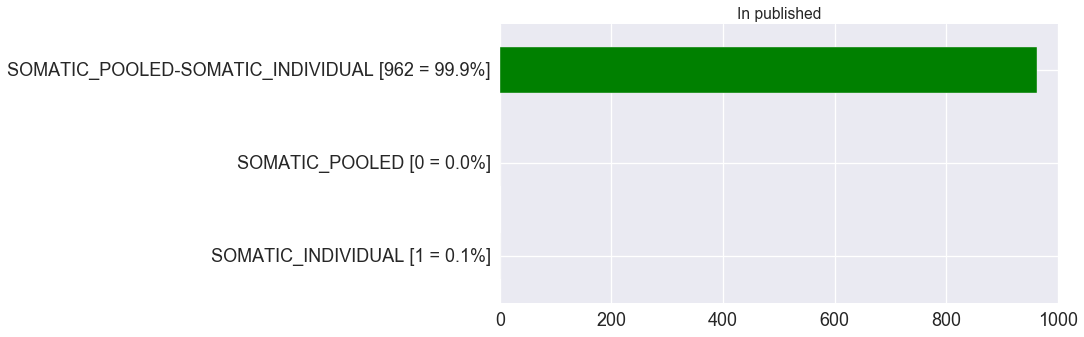

In [12]:
counts = df_snv.ix[
    (df_snv.trigger_SOMATIC_POOLED | df_snv.trigger_SOMATIC_INDIVIDUAL) & (~df_snv.trigger_GERMLINE_POOLED)
].groupby(["guacamole_status", "called_published"])["genome"].count().sort(inplace=False).iloc[::-1].to_frame().reset_index()


def make_series(sub_counts):
    sub_counts = sub_counts.copy()
    sub_counts.index = sub_counts.guacamole_status
    sub_counts = move_to_front(sub_counts.genome, good_calls).iloc[::-1]
    sub_counts = add_values_to_series(sub_counts.fillna(0).astype(int))
    return sub_counts
    
counts_good = make_series(counts.ix[counts.called_published])
counts_bad = make_series(counts.ix[~counts.called_published])

counts_good.plot('barh',
                 title="In published",
                 colors=["green" if c.split()[0] in good_calls else "red" for c in counts_good.index],
                 figsize=(10,10))
pyplot.ylabel("")

pyplot.figure()
counts_bad.plot('barh',
                title="NOT in published",
                colors=["green" if c.split()[0] in good_calls else "red" for c in counts_bad.index],
                figsize=(10,10))
pyplot.ylabel("")

pyplot.figure()
counts_bad_zoom = counts_bad.iloc[-3:]
counts_bad_zoom.index = [x.split()[0] for x in counts_bad_zoom.index]
counts_bad_zoom = add_values_to_series(counts_bad_zoom)
counts_bad_zoom.plot('barh',
                title="NOT in published",
                colors=["green" if c.split()[0] in good_calls else "red" for c in counts_bad_zoom.index],
                figsize=(10,5))
pyplot.ylabel("")


pyplot.figure()
counts_good_zoom = counts_good.iloc[-3:]
counts_good_zoom.index = [x.split()[0] for x in counts_good_zoom.index]
counts_good_zoom = add_values_to_series(counts_good_zoom)
counts_good_zoom.plot('barh',
                title="In published",
                colors=["green" if c.split()[0] in good_calls else "red" for c in counts_good_zoom.index],
                figsize=(10,5))
pyplot.ylabel("")

#counts_good.reset_index("guacamole_status").plot('barh')

# summary of our bad calls: if we constrain the number of bad calls (via automatic tuning of filters and likelhood cutoff), how many calls do we miss? Precision recall curve.

In [13]:
features = ["AD_alt", "AD_ref", "VAF", "FS", "RL_alt", "RL_ref"]
columns = ["called_published"]
for sample in ["normal_blood", "pooled_tumor"]:
    columns.extend(["%s_%s" % (sample, f) for f in features])
ml_df = df_snv.ix[~df_snv.alt_disagreement][columns].dropna()
ml_df["normal_blood_RL_diff"] = ml_df["normal_blood_RL_alt"] - ml_df["normal_blood_RL_ref"]
ml_df["pooled_tumor_RL_diff"] = ml_df["pooled_tumor_RL_alt"] - ml_df["pooled_tumor_RL_ref"]
ml_df

,called_published,normal_blood_AD_alt,normal_blood_AD_ref,normal_blood_VAF,normal_blood_FS,normal_blood_RL_alt,normal_blood_RL_ref,pooled_tumor_AD_alt,pooled_tumor_AD_ref,pooled_tumor_VAF,pooled_tumor_FS,pooled_tumor_RL_alt,pooled_tumor_RL_ref,normal_blood_RL_diff,pooled_tumor_RL_diff
2,False,63.0,688.0,0.082,1192.0,-176.633060,-138.567940,38.0,497.0,0.069,734.0,-102.266810,-113.125670,-38.065120,10.858860
3,False,27.0,259.0,0.094,317.0,-80.796931,-79.777946,19.0,213.0,0.082,328.0,-49.921922,-53.661681,-1.018985,3.739759
4,False,6.0,210.0,0.027,132.0,-71.973763,-34.317731,12.0,139.0,0.077,211.0,-39.577666,-41.359145,-37.656032,1.781479
6,False,14.0,72.0,0.161,171.0,-26.672205,-25.989177,18.0,97.0,0.154,237.0,-24.570193,-26.227011,-0.683028,1.656818
7,False,9.0,43.0,0.170,107.0,-18.414145,-14.792367,28.0,60.0,0.311,280.0,-26.356425,-45.823086,-3.621778,19.466661
9,False,16.0,300.0,0.050,330.0,-91.589589,-59.773994,23.0,289.0,0.073,433.0,-52.110612,-55.610197,-31.815595,3.499585
10,False,21.0,340.0,0.058,417.0,-102.034430,-77.663671,34.0,328.0,0.094,593.0,-65.899458,-90.693147,-24.370759,24.793689
13,False,28.0,338.0,0.076,507.0,-102.937790,-82.164753,41.0,318.0,0.114,675.0,-67.201951,-105.069520,-20.773037,37.867569
17,False,6.0,254.0,0.022,132.0,-85.145468,-34.671798,15.0,238.0,0.057,294.0,-57.834479,-59.887948,-50.473670,2.053469
18,False,13.0,158.0,0.076,221.0,-50.960679,-34.209897,33.0,152.0,0.177,457.0,-53.157883,-82.880203,-16.750782,29.722320


In [14]:
ml_df.iloc[0]

called_published          False
normal_blood_AD_alt          63
normal_blood_AD_ref         688
normal_blood_VAF          0.082
normal_blood_FS            1192
normal_blood_RL_alt    -176.633
normal_blood_RL_ref    -138.568
pooled_tumor_AD_alt          38
pooled_tumor_AD_ref         497
pooled_tumor_VAF          0.069
pooled_tumor_FS             734
pooled_tumor_RL_alt    -102.267
pooled_tumor_RL_ref    -113.126
normal_blood_RL_diff   -38.0651
pooled_tumor_RL_diff    10.8589
Name: 2, dtype: object

In [15]:
ml_df.to_csv("aocs_ml_df.csv", index=False)

In [16]:
random_state = 0

X = ml_df[ml_df.columns[1:]].values
y = ml_df.called_published.values

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=.5, random_state=random_state)

model = sklearn.linear_model.LogisticRegression()
y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]


In [17]:
pandas.Series(model.coef_[0], index=list(ml_df.columns)[1:])

normal_blood_AD_alt    -0.181996
normal_blood_AD_ref     0.027104
normal_blood_VAF       -0.021203
normal_blood_FS        -0.052926
normal_blood_RL_alt     0.082172
normal_blood_RL_ref     0.184154
pooled_tumor_AD_alt    -0.481613
pooled_tumor_AD_ref    -0.012992
pooled_tumor_VAF       -0.028089
pooled_tumor_FS         0.044698
pooled_tumor_RL_alt     0.228580
pooled_tumor_RL_ref     0.024662
normal_blood_RL_diff   -0.101982
pooled_tumor_RL_diff    0.203919
dtype: float64

In [18]:
y_score

array([  1.12394762e-06,   2.84498007e-15,   1.96922159e-01, ...,
         9.99418165e-01,   2.71709156e-13,   3.49934674e-03])

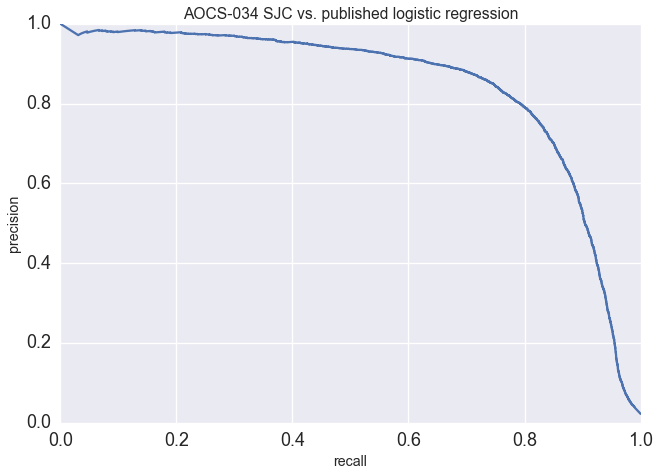

In [19]:
(precision, recall, thresholds) = sklearn.metrics.precision_recall_curve(y_test, y_score)
pyplot.plot(recall, precision)
pyplot.xlabel("recall")
pyplot.ylabel('precision')
pyplot.title("AOCS-034 SJC vs. published logistic regression")

In [20]:
model = sklearn.ensemble.RandomForestClassifier(n_jobs=-1)
y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]

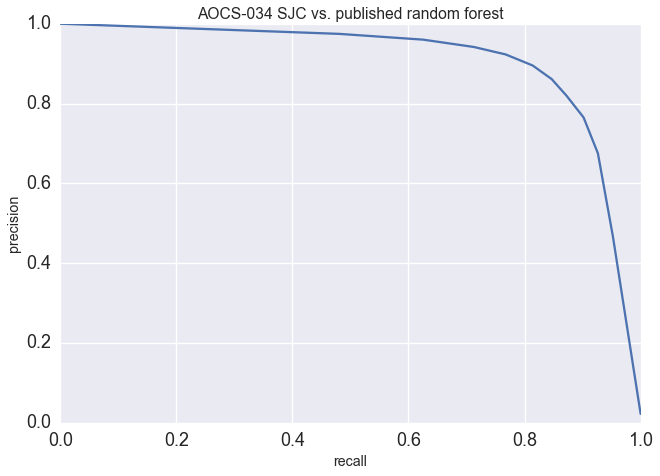

In [21]:
(precision, recall, thresholds) = sklearn.metrics.precision_recall_curve(y_test, y_score)
pyplot.plot(recall, precision)
pyplot.xlabel("recall")
pyplot.ylabel('precision')
pyplot.title("AOCS-034 SJC vs. published random forest")

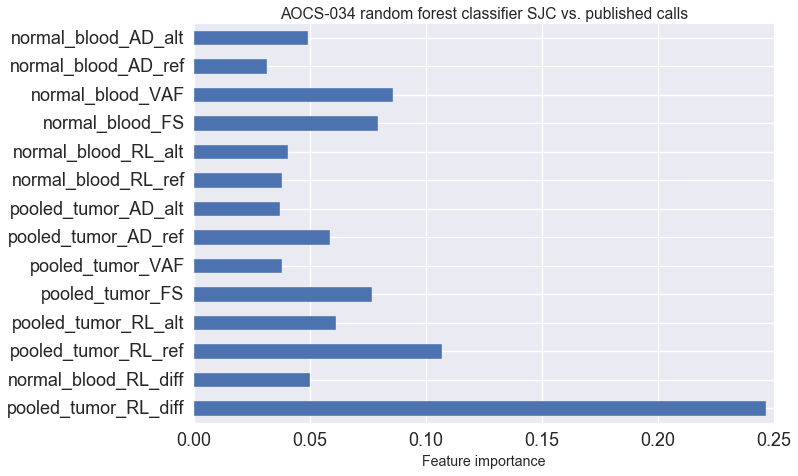

In [22]:
pandas.Series(model.feature_importances_, index=list(ml_df.columns)[1:])[::-1].plot('barh')
pyplot.xlabel("Feature importance")
pyplot.title("AOCS-034 random forest classifier SJC vs. published calls")

In [24]:
random_state = 0

X = ml_df[ml_df.columns[1:]].values
y = ml_df.called_published.values

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=.5, random_state=random_state)

model = sklearn.tree.DecisionTreeClassifier(max_depth=4)
y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]

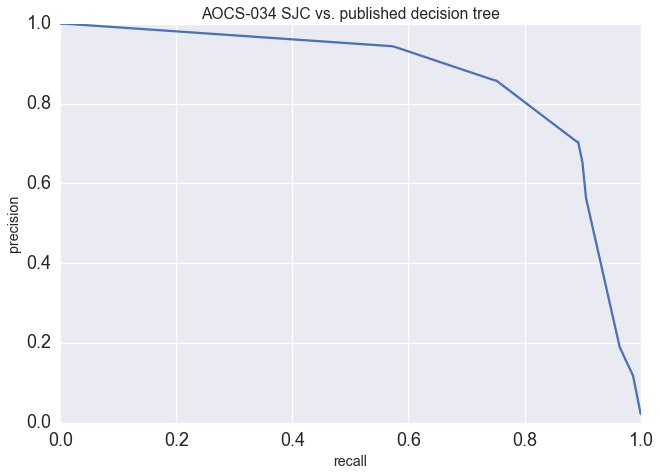

In [25]:
(precision, recall, thresholds) = sklearn.metrics.precision_recall_curve(y_test, y_score)
pyplot.plot(recall, precision)
pyplot.xlabel("recall")
pyplot.ylabel('precision')
pyplot.title("AOCS-034 SJC vs. published decision tree")

In [26]:
sklearn.tree.export_graphviz(
    model.tree_,
    "aocs034-decision-tree.dot", rotate=True,
    feature_names=list(ml_df.columns)[1:])

! dot -Tpng aocs034-decision-tree.dot -o aocs034-decision-tree.png


In [ ]:
sklearn.tree.export_graphviz?